## **Simple Linear Regression: Predicting House Prices**

**Objective:**

Your task is to build a **Linear Regression** model to predict the **price of a house** based on its size. This exercise will help you understand the relationship between variables and how to apply Linear Regression for real-world prediction tasks.

**Dataset:**

You will work with a dataset `data/housing.csv` containing the following columns:
- **price**: The price of the house in dollars.
- **area**: The size of the house in square feet.


Steps to Complete:

1. **Data Loading and Exploration**  
   - Visualize the relationship between **Size** and **Price** using a scatter plot.
   - Check for outliers, missing values, or anomalies in the dataset.

2. **Build a Linear Regression Model**  
   - Split the dataset into **training** and **test sets** (80% training, 20% testing).
   - Implement a **Simple Linear Regression** model using:
     - **Manual Calculation** (Optional): Derive the slope $m$ and intercept $b$ using the formulas for linear regression:
       $$
       m = \frac{\sum{(x_i - \bar{x})(y_i - \bar{y})}}{\sum{(x_i - \bar{x})^2}}, \quad b = \bar{y} - m\bar{x}
       $$
     - **Scikit-learn**: Use `LinearRegression` from `sklearn.linear_model` to fit the model.

3. **Model Evaluation**  
   - Predict the test set house prices using the model.
   - Evaluate the model’s performance using:
     - **Mean Absolute Error (MAE)**
     - **Mean Squared Error (MSE)**
     - **R² Score**
   - Interpret the slope ($m$) and intercept ($b$) of the linear equation.

4. **Visualization**  
   - Plot the **regression line** over the scatter plot of **area** vs. **price**.
   - Visualize the residuals (errors) between the actual and predicted house prices.

5. **Prediction**  
   - Use the trained model to predict the price of a house with a size of 1,000 square feet.
   - Discuss whether the prediction seems reasonable based on the dataset.


**Deliverables:**

- A Python script or Jupyter Notebook containing:
  - Data loading, preprocessing, and visualization.
  - Implementation of Simple Linear Regression.
  - Model evaluation and insights.
  - Predictions and their interpretation.
- A brief report discussing:
  - The relationship between **Size** and **Price**.
  - The limitations of using Linear Regression for this dataset.


**Useful Hints:**

- Use `numpy` for manual calculations and matrix operations.
- Use `pandas` for data manipulation and `matplotlib`/`seaborn` for visualizations.
- Experiment with data transformations (e.g., log or scaling) to improve results.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [ ]:
r'D:\hobby\MAAB\ai-roadmap\content\ml\supervised\02 multiple linear regression\data\housing.csv'# Load data
df = pd.read_csv()
df.head(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [9]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


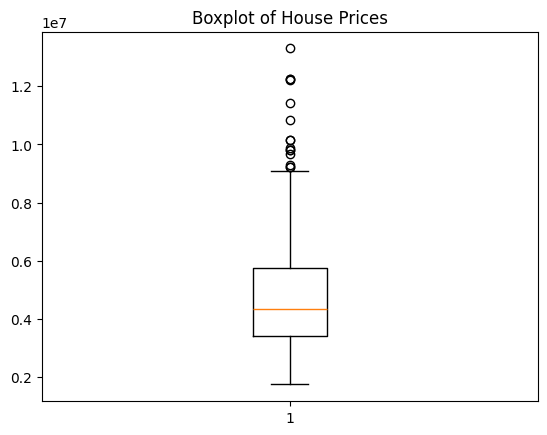

In [12]:
plt.boxplot(df['price'])
plt.title('Boxplot of House Prices')
plt.show()

Text(0, 0.5, 'Frequency')

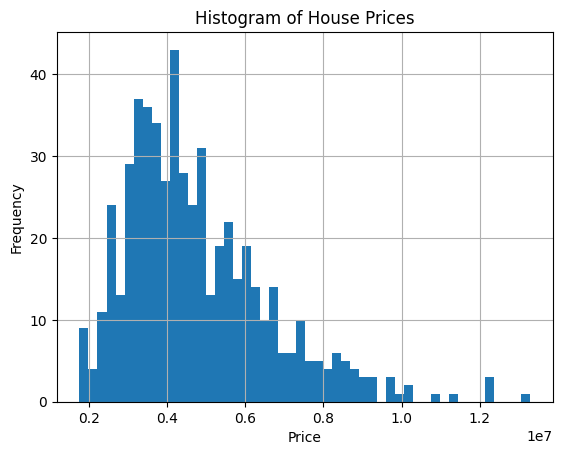

In [13]:
df['price'].hist(bins=50)
plt.title('Histogram of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency') 

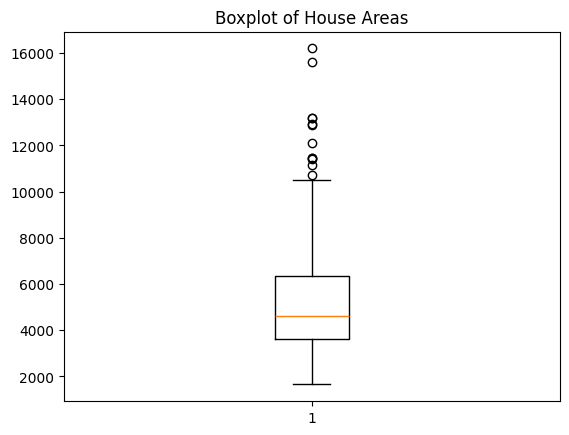

In [14]:
plt.boxplot(df['area'])
plt.title('Boxplot of House Areas')
plt.show()

Text(0, 0.5, 'Frequency')

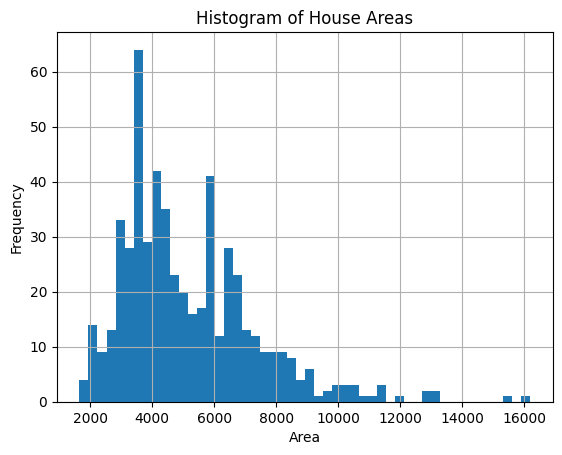

In [15]:
df['area'].hist(bins=50)
plt.title('Histogram of House Areas')
plt.xlabel('Area')
plt.ylabel('Frequency')


In [19]:
# get price and area columns
Y = df['price'].values
X = df['area'].values

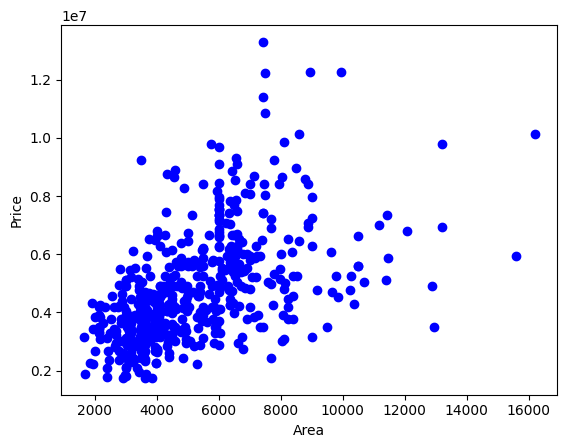

In [21]:
plt.scatter(X, Y, color='blue', label='Orginal data')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

In [22]:
# build linear regression model using np
X_mean = np.mean(X)
Y_mean = np.mean(Y)
k = np.sum((X - X_mean) * (Y - Y_mean)) / np.sum((X - X_mean)**2)
b = Y_mean - k * X_mean

print(f"Manual Linear Regression: Slope = {k:.4f}, Intercept = {b:.2f}")

Manual Linear Regression: Slope = 461.9749, Intercept = 2387308.48


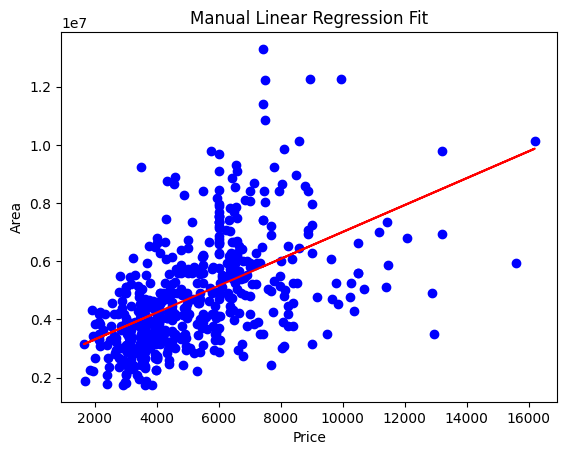

In [23]:
def fitting_line(x):
    return k * x + b    


# Plotting the fitting line
plt.scatter(X, Y, color='blue', label='Original data')
plt.plot(X, fitting_line(X), color='red', label='Fitting line')
plt.xlabel('Price')
plt.ylabel('Area')
plt.title('Manual Linear Regression Fit')
plt.show()

In [24]:
# build model using sklearn
model = LinearRegression()
model.fit(X.reshape(-1, 1), Y)
print(f"Sklearn Linear Regression: Slope = {model.coef_[0]:.4f}, Intercept = {model.intercept_:.2f}")

Sklearn Linear Regression: Slope = 461.9749, Intercept = 2387308.48


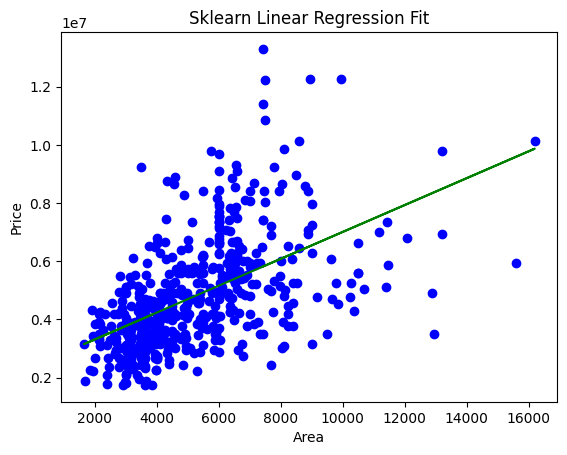

In [26]:
model_predictions = model.predict(X.reshape(-1, 1))
# Plotting the sklearn fitting line
plt.plot(X, model_predictions, color='green', label='Sklearn Fitting line')
plt.scatter(X, Y, color='blue', label='Original data')
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Sklearn Linear Regression Fit')
plt.show()

In [28]:
# Evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(Y, model_predictions)
mse = mean_squared_error(Y, model_predictions)
r2 = r2_score(Y, model_predictions)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"R^2 Score: {r2:.4f}")

MAE: 1172305.51
MSE: 2488861398180.66
R^2 Score: 0.2873
